### Exploratory Data Analysis

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('SAML-D.csv')

In [14]:
print(df.head())

       Time        Date  Sender_account  Receiver_account    Amount  \
0  10:35:19  07/10/2022      8724731955        2769355426   1459.15   
1  10:35:20  07/10/2022      1491989064        8401255335   6019.64   
2  10:35:20  07/10/2022       287305149        4404767002  14328.44   
3  10:35:21  07/10/2022      5376652437        9600420220  11895.00   
4  10:35:21  07/10/2022      9614186178        3803336972    115.25   

  Payment_currency Received_currency Sender_bank_location  \
0        UK pounds         UK pounds                   UK   
1        UK pounds            Dirham                   UK   
2        UK pounds         UK pounds                   UK   
3        UK pounds         UK pounds                   UK   
4        UK pounds         UK pounds                   UK   

  Receiver_bank_location  Payment_type  Is_laundering       Laundering_type  
0                     UK  Cash Deposit              0  Normal_Cash_Deposits  
1                    UAE  Cross-border            

In [15]:
# Inspect the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Time                    1048575 non-null  object 
 1   Date                    1048575 non-null  object 
 2   Sender_account          1048575 non-null  int64  
 3   Receiver_account        1048575 non-null  int64  
 4   Amount                  1048575 non-null  float64
 5   Payment_currency        1048575 non-null  object 
 6   Received_currency       1048575 non-null  object 
 7   Sender_bank_location    1048575 non-null  object 
 8   Receiver_bank_location  1048575 non-null  object 
 9   Payment_type            1048575 non-null  object 
 10  Is_laundering           1048575 non-null  int64  
 11  Laundering_type         1048575 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 96.0+ MB
None

First few rows:
       Time       

In [16]:
# Count blank cells per column
print("\nBlank cells per column:")
print((df == "").sum())

# Count total blank cells
total_blank_cells = (df == "").sum().sum()
print("\nTotal blank cells in the dataset:", total_blank_cells)


Blank cells per column:
Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

Total blank cells in the dataset: 0


In [17]:
df = df.isnull().sum()
TotalMissingValue = df.sum()

print(df)
print("Total missing values are:", TotalMissingValue)

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64
Total missing values are: 0


In [18]:
# Try converting 'Amount' to numeric, force errors to NaN
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


In [19]:
df.duplicated().sum() 


np.int64(11)

In [20]:
s = df.duplicated().sum()
df.drop_duplicates(inplace=True)

Dataset Overview:
Total number of transactions: 1048575
Number of columns: 12

Column Names:
['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount', 'Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Is_laundering', 'Laundering_type']

Data Types:
Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object

Missing Values:
Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location 

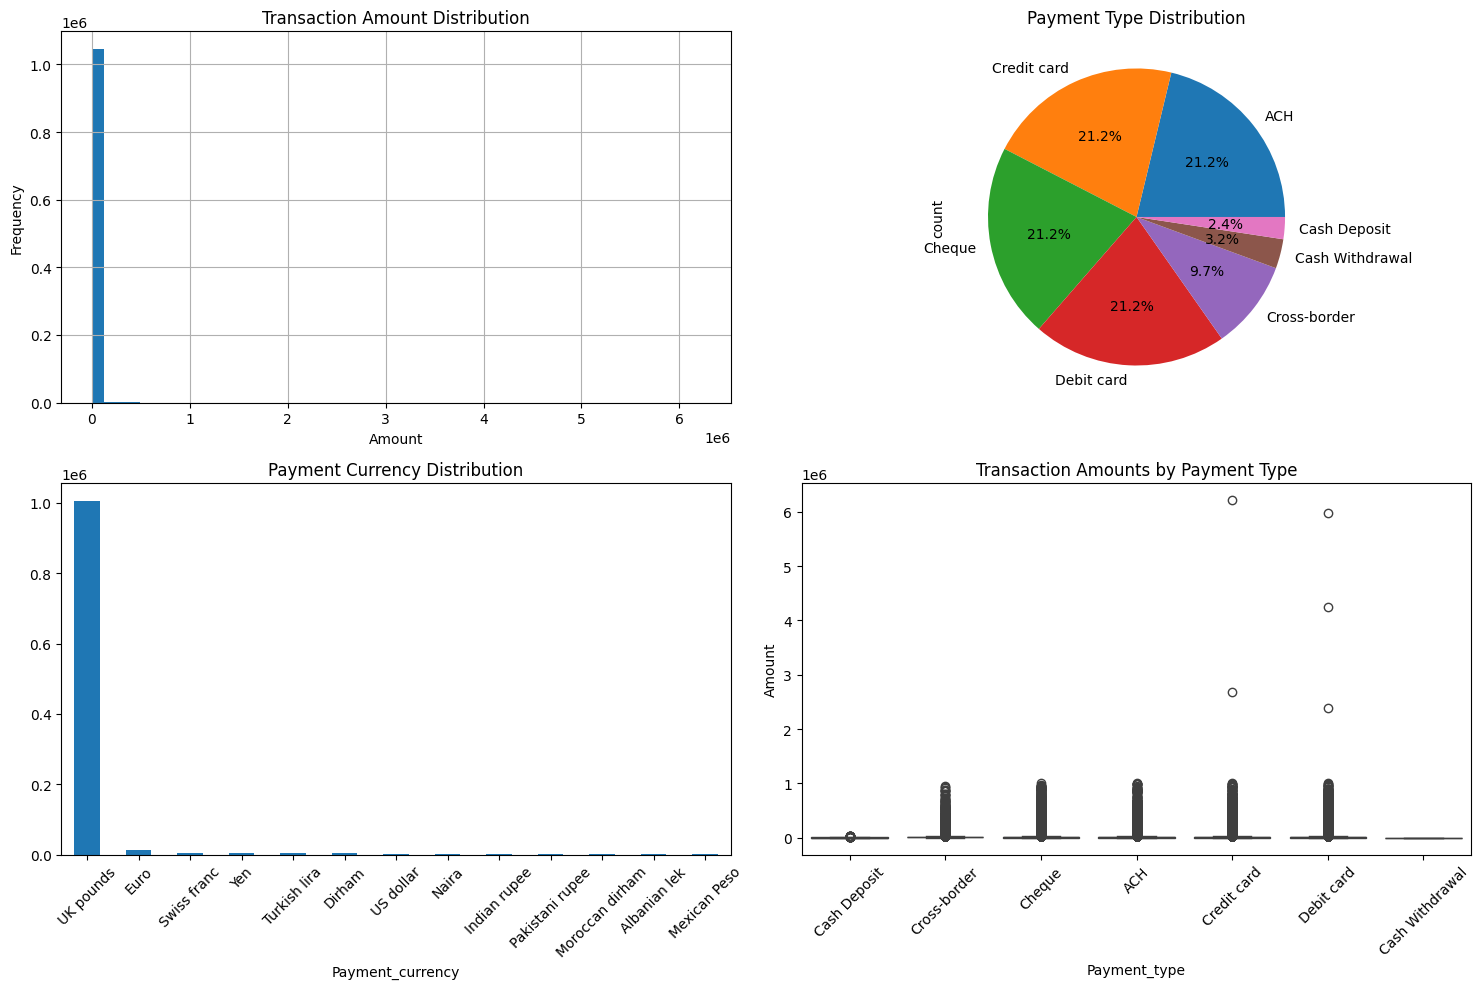


Potential Fraud Indicators:
Transactions flagged for laundering:
Laundering_type
Structuring             234
Cash_Withdrawal         122
Deposit-Send             98
Smurfing                 80
Layered_Fan_Out          78
Stacked Bipartite        62
Behavioural_Change_1     55
Fan_In                   37
Gather-Scatter           33
Layered_Fan_In           31
Single_large             29
Behavioural_Change_2     28
Bipartite                23
Cycle                    16
Fan_Out                  14
Scatter-Gather           11
Over-Invoicing            5
Name: count, dtype: int64


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('SAML-D.csv')

def perform_eda(df):
    # 1. Basic Dataset Information
    print("Dataset Overview:")
    print(f"Total number of transactions: {len(df)}")
    print(f"Number of columns: {len(df.columns)}")
    print("\nColumn Names:")
    print(df.columns.tolist())
    
    # 2. Data Types and Missing Values
    print("\nData Types:")
    print(df.dtypes)
    
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # 3. Numerical Columns Analysis
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    print("\nNumerical Columns Summary:")
    print(df[numerical_columns].describe())
    
    # 4. Transaction Amount Analysis
    print("\nTransaction Amount Analysis:")
    print(f"Total Transaction Volume: £{df['Amount'].sum():,.2f}")
    print(f"Average Transaction Amount: £{df['Amount'].mean():,.2f}")
    print(f"Median Transaction Amount: £{df['Amount'].median():,.2f}")
    
    # 5. Payment Currency Distribution
    print("\nPayment Currency Distribution:")
    print(df['Payment_currency'].value_counts())
    
    # 6. Payment Type Analysis
    print("\nPayment Type Distribution:")
    print(df['Payment_type'].value_counts())
    
    # 7. Bank Location Analysis
    print("\nSender Bank Location Distribution:")
    print(df['Sender_bank_location'].value_counts())
    
    print("\nReceiver Bank Location Distribution:")
    print(df['Receiver_bank_location'].value_counts())
    
    # 8. Visualization Plots
    plt.figure(figsize=(15, 10))
    
    # Transaction Amount Distribution
    plt.subplot(2, 2, 1)
    df['Amount'].hist(bins=50)
    plt.title('Transaction Amount Distribution')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    
    # Payment Type Pie Chart
    plt.subplot(2, 2, 2)
    df['Payment_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Payment Type Distribution')
    
    # Currency Distribution
    plt.subplot(2, 2, 3)
    df['Payment_currency'].value_counts().plot(kind='bar')
    plt.title('Payment Currency Distribution')
    plt.xticks(rotation=45)
    
    # Box Plot of Transaction Amounts by Payment Type
    plt.subplot(2, 2, 4)
    sns.boxplot(x='Payment_type', y='Amount', data=df)
    plt.title('Transaction Amounts by Payment Type')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 9. Potential Fraud Indicators
    print("\nPotential Fraud Indicators:")
    print("Transactions flagged for laundering:")
    print(df[df['Is_laundering'] == 1]['Laundering_type'].value_counts())

# Call the EDA function
perform_eda(df)

Full Correlation Matrix:
                  Sender_account  Receiver_account    Amount  Is_laundering
Sender_account          1.000000         -0.000779  0.000961       0.003103
Receiver_account       -0.000779          1.000000  0.000951      -0.001941
Amount                  0.000961          0.000951  1.000000       0.034432
Is_laundering           0.003103         -0.001941  0.034432       1.000000


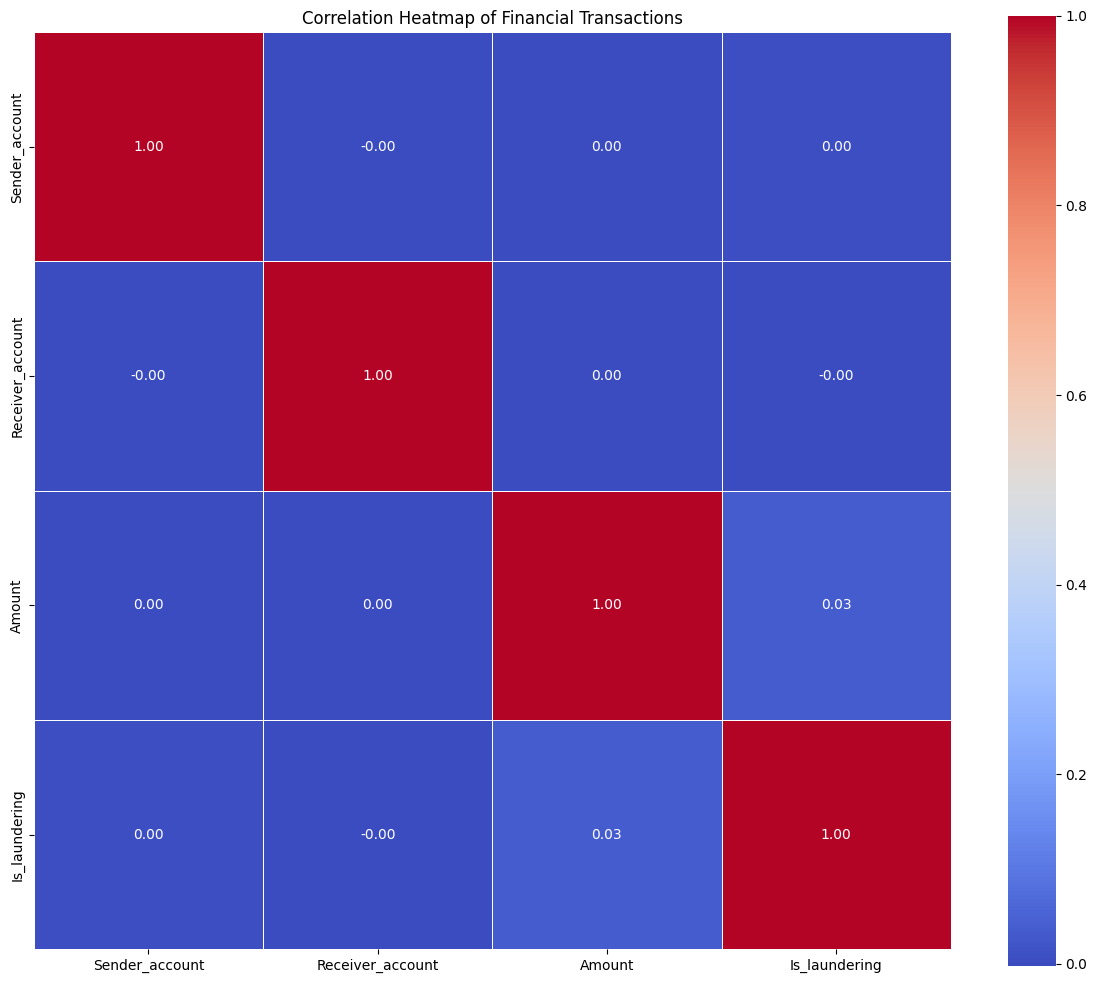


Top 5 Strongest Correlations:
Amount          Is_laundering     0.034432
Is_laundering   Amount            0.034432
Sender_account  Is_laundering     0.003103
Is_laundering   Sender_account    0.003103
Sender_account  Amount            0.000961
dtype: float64


In [22]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_columns].corr()

# Option 1: Full Correlation Matrix
print("Full Correlation Matrix:")
print(correlation_matrix)

# Option 2: Heatmap Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)
plt.title('Correlation Heatmap of Financial Transactions')
plt.tight_layout()
plt.show()

# Option 3: Most Correlated Pairs
print("\nTop 5 Strongest Correlations:")
corr_pairs = correlation_matrix.unstack()
sorted_corrs = corr_pairs[abs(corr_pairs) < 1].sort_values(kind="quicksort", ascending=False)
print(sorted_corrs[:5])